# Expresiones regulares y tokenización de palabras
Aqui se presentan algunos conceptos básicos de la PNL, como la tokenización de palabras y las expresiones regulares para ayudar a analizar el texto. También aprenderás cómo manejar texto en otros idiomas y la tokenización más difícil que puedas encontrar. Este es un resumen de  "Procesamiento del Lenguaje Natural en Python", vía datacamp.

- toc: true
- insignias: true
- comentarios: true
- autor: Chanseok Kang
- categorías: [Python, Datacamp, Procesamiento_del_lenguaje_natural]
- imagen: images/line_num_words.png

In [1]:
import re
import nltk           #Tokenización de palabras con NLTK
from pprint import pprint
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')# descarga y desempaqueta nltk_data, #nltk.download('stopwords'),#nltk.download('corpus')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Introducción a las expresiones regulares
- Expresiones regulares
    - Cadenas con una sintaxis especial
    - Nos permiten emparejar patrones en otras cadenas
    - Aplicaciones de las expresiones regulares
        - Encontrar todos los enlaces web de un documento
        - Analizar direcciones de correo electrónico, eliminar/reemplazar caracteres no deseados
- Patrones Regex comunes

| patrón | matches | ejemplos |
| ------- | ------- | -------- |
| \w+ | palabra | 'Magia' |
| \d | dígito | 9 |
| \s | espacio | '' |
| .* | comodín | 'usuario74' |
| + or * | greedy match | 'aaaaaaa' |
| \S | sin espacio | 'sin_espacios' |
| [a-z] | grupo minúsculas | 'abcdfg' |

- Módulo **re** de Python
    - `split`: dividir una cadena en regex
    - `findall`: buscar todos los patrones de una cadena
    - `search`: buscar un patrón
    - `match`: hacer coincidir una cadena completa o una subcadena a partir de un patrón
    - El patrón primero y la cadena después
    - Puede devolver un iterador, una cadena o un objeto de coincidencia

In [2]:
cadena = "Escribamos RegEx!"
PATRON = r"\w+"
re.findall(PATRON, cadena)

['Escribamos', 'RegEx']

### Práctica de expresiones regulares - re.split() y re.findall()
Ahora tendrás la oportunidad de escribir algunas expresiones regulares para emparejar dígitos, cadenas y caracteres no alfanuméricos. Echa un vistazo a "cadena" primero imprimiéndola en la IPython Shell, para determinar cómo podrías emparejar mejor los diferentes pasos.

Nota: Es importante prefijar tus **patrones regex** con `r` para asegurarte de que tus patrones se interpretan de la forma que deseas. De lo contrario, puede encontrarse con problemas relacionados con las secuencias de escape en las cadenas.

Por ejemplo, `"\n"` en Python se usa para indicar una nueva línea, pero si usas el prefijo `r`, se interpretará como la cadena cruda `"\n"` - es decir, el carácter `"\"` seguido del carácter `"n"` - y no como una nueva línea.

Recuerda que la sintaxis para la librería regex es siempre pasar primero el **patrón**, y después la **cadena**.

In [3]:
cadena = "¡Escribamos RegEx!  ¿No será divertido?  Seguro que sí.  ¿Puedes encontrar 4 frases?  ¿O quizás las 19 palabras?"

In [4]:
# Escribe un patrón para que coincida con las finales de frase: terminaciones_de_frase
terminaciones_de_frase = r"[.?!]"

# Divide "cadena" en los finales de frase e imprime el resultado
print(re.split(terminaciones_de_frase, cadena),"\n")

# Encuentra todas las palabras capitalizadas en "cadena" e imprime el resultado
palabras_MAYUS = r"[A-Z]\w+"
print(re.findall(palabras_MAYUS, cadena),"\n")

# Divide "cadena" en espacios e imprime el resultado
espacios = r"\s+"
print(re.split(espacios, cadena),"\n")

# Encuentra todos los dígitos en "cadena" e imprime el resultado
digitos = r"\d+"
print(re.findall(digitos, cadena),"\n")

['¡Escribamos RegEx', '  ¿No será divertido', '  Seguro que sí', '  ¿Puedes encontrar 4 frases', '  ¿O quizás las 19 palabras', ''] 

['Escribamos', 'RegEx', 'No', 'Seguro', 'Puedes'] 

['¡Escribamos', 'RegEx!', '¿No', 'será', 'divertido?', 'Seguro', 'que', 'sí.', '¿Puedes', 'encontrar', '4', 'frases?', '¿O', 'quizás', 'las', '19', 'palabras?'] 

['4', '19'] 



## Introducción a la tokenización

Tokenización es el proceso de división de un texto en unidades más pequeñas llamadas **«tokens»**, que pueden ser palabras, subpalabras o caracteres. Esta división ayuda a estructurar el texto y facilita su procesamiento posterior por modelos y algoritmos de **NLP**.
- Tokenizacion
    - Convertir una cadena o un documento en **tokens** (trozos más pequeños)
    - Una etapa de la preparación de un texto para la PNL
    - Muchas teorías y reglas diferentes
    - Puede crear sus propias reglas utilizando expresiones regulares
    - Algunos ejemplos:
        - Separación de palabras o frases
        - Separar los signos de puntuación
        - Separar todos los hashtags de un tweet
- ¿Por qué tokenizar?
    - Es más fácil determinar la parte de la oración
    - Coincidencia de palabras comunes
    - Eliminación de tokens no deseados
- Otros tokenizadores `nltk`
    - `sent_tokenize`: tokeniza un documento en frases
    - `regexp_tokenize`: tokeniza una cadena o documento basándose en un patrón de expresión regular
    - `TweetTokenizer`: clase especial para la tokenización de tweets, que permite separar hashtags, menciones y muchos signos de exclamación.

### Tokenización de palabras con NLTK
Aquí utilizarás la primera escena de Monty Python's Holy Grail, que ha sido precargada como `scene_one`.

Tu trabajo en este ejercicio es utilizar `word_tokenize` y `sent_tokenize` de `nltk.tokenize` para tokenizar tanto palabras como frases a partir de cadenas de Python - en este caso, la primera escena de El Santo Grial de los Monty Python.

> Note: Before using NLTK, you must install `punkt` package for tokenizer

In [ ]:
with open('grail.txt', 'r') as file:
    holy_grail = file.read()
    scene_one = re.split('SCENE 2:', holy_grail)[0]

In [ ]:
scene_one

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

### Más regex con re.search()
En este ejercicio, utilizarás `re.search()` y `re.match()` para encontrar tokens específicos. Tanto search como match esperan patrones regex, similares a los que definiste en un ejercicio anterior. Aplicarás estos métodos de la biblioteca regex al mismo texto de Monty Python del corpus `nltk`.



In [ ]:
# Buscar la primera aparición de la palabra "coconuts" en scene_one: match
match = re.search("coconuts", scene_one)

# Imprime los índices de inicio y final de la coincidencia (match)
print(match.start(), match.end())

In [ ]:
# Escribe una expresión regular para buscar cualquier cosa entre corchetes: pattern1
patron1 = r"\[.*\]"

# Usa re.search para encontrar el primer texto entre corchetes
print(re.search(patron1, scene_one))

In [ ]:
# Encuentra la notación de guión al principio de la cuarta frase e imprímela
patron2 = r"[\w\s]+:"
print(re.match(patron2, sentences[3]))

## Tokenización avanzada con NLTK y regex
- Grupos regex usando or `|`
    - OR se representa con `|`.
    - Puede definir un grupo usando `()`.
    - Puedes definir rangos de caracteres explícitos usando `[]`.
- Rangos y grupos regex

| patrón | coincidencias (match) | ejemplo |
| ------- | ------- | ------- |
| [A-Za-z]+ | alfabeto en mayúsculas y minúsculas | 'ABCDEFghijk' |
| [0-9] | números del 0 al 9 | 9 |
| [A-Za-z\-\.]+ | alfabeto en mayúsculas y minúsculas, - y . | 'Mi-Website.com' |
| (a-z) | a, - y z | 'a-z' |
| (\s+|,) | espacios o una coma | ', ' |

### Elegir un tokenizador
Dada la siguiente cadena, ¿cuál de los siguientes patrones es el mejor tokenizador? Si es posible, quiere mantener la puntuación de la frase como tokens separados, pero que `'#1'` siga siendo un único token.
```python
cadena = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
```

Además, `regexp_tokenize` se ha importado desde `nltk.tokenize`. Se puede utilizar `regexp_tokenize(cadena, patron)` con `cadena` y uno de los patrones como argumentos para experimentar por ti mismo y ver cuál es el mejor tokenizer.

In [ ]:
from nltk.tokenize import regexp_tokenize

cadena = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

patron1 = r'(\\w+|\\?|!)'
patron2 = r"(\w+|#\d|\?|!)"
patron3 = r'(#\\d\\w+\\?!)'
patron4 = r'\\s+'

In [ ]:
pprint(regexp_tokenize(cadena, patron2))

### Regex con tokenización NLTK
Twitter es una fuente frecuentemente utilizada para textos y tareas NLP. En este ejercicio, se construirá un tokenizador más complejo para tweets con hashtags y menciones usando nltk y regex. La clase `nltk.tokenize.TweetTokenizer` te proporciona algunos métodos y atributos extra para analizar tweets.

Aquí, se dan algunos ejemplos de tweets para analizar utilizando tanto `TweetTokenizer` como `regexp_tokenize` del módulo `nltk.tokenize`.

A diferencia de la sintaxis de la librería regex, con `nltk_tokenize()` se pasa el patrón como segundo argumento.

In [ ]:
tweets = ['¡¡Este es el mejor ejercicio #nlp que he encontrado online! #python',
 '#NLP es super divertido! <3 #learning',
 'Gracias @datacamp :) #nlp #python']

In [ ]:
from nltk.tokenize import regexp_tokenize, TweetTokenizer

# Define un patrón regex para encontrar hashtags: patron1
patron1 = r"#\w+"

# Utiliza el patrón en el primer tweet de la lista de tweets
hashtags = regexp_tokenize(tweets[0], patron1)
print(hashtags)

In [ ]:
# escribe un patrón que coincida tanto con menciones (@) como con hashtags
patron2 = r"[@|#]\w+"

# Utiliza el patrón en el último tweet de la lista de tweets
mentions_hashtags = regexp_tokenize(tweets[-1], patron2)
print(mentions_hashtags)

In [ ]:
# Usar TweetTokenizer para tokenizar todos los tweets de una lista.
tokenizar = TweetTokenizer()
todos_tokens = [tokenizar.tokenize(t) for t in tweets]
print(todos_tokens)

### Tokenización no-ascii
En este ejercicio, practicarás la tokenización avanzada mediante la tokenización de texto no basado en ascii. Utilizarás alemán con emoji.

Aquí tienes acceso a una cadena llamada `texto_aleman`, que se ha impreso en el Shell. Observa los emoji y los caracteres alemanes.

Los rangos Unicode para emoji son:

`('\U0001F300'-'\U0001F5FF')`, `('\U0001F600-\U0001F64F')`, `('\U0001F680-\U0001F6FF')`, and `('\u2600'-\u26FF-\u2700-\u27BF')`.

In [ ]:
texto_aleman = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [ ]:
# Tokenizar e imprimir todas las palabras en german_text
todas_las_palabras = word_tokenize(texto_aleman)
print(todas_las_palabras,"\n")

# Tokenizar e imprimir sólo mayúsculas
palabras_MAYUS = r"[A-ZÜ]\w+"
print(regexp_tokenize(texto_aleman, palabras_MAYUS),"\n")

# Tokenizar e imprimir sólo emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(texto_aleman, emoji),"\n")

In [ ]:
text = u'Esta es una carita feliz \U0001f604'
print(text) # con emoji

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return regrex_pattern.sub(r'',text)

print(deEmojify(text))

## Gráfico de longitud de palabra con NLTK


### Práctica de gráficos
Intenta usar tus nuevas habilidades para encontrar y graficar el número de palabras por línea en el script usando matplotlib. El guión del Grial está cargado para ti, y necesitas usar regex para encontrar las palabras por línea.

El uso de listas comprensivas acelerará tus cálculos. Por ejemplo: `my_lines = [tokenize(l) for l in lines]` llamará a una función tokenize en cada línea de la lista lines. La nueva lista transformada se guardará en la variable "mis_líneas".

In [ ]:
import matplotlib.pyplot as plt

# Dividir el script en líneas: líneas
lineas = holy_grail.split('\n')

# Reemplazar todas las líneas de script para el altavoz
patron = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lineas = [re.sub(patron, '', l) for l in lineas]

# Tokenizar cada linea: lineas_tokenizadas
lineas_tokenizadas = [regexp_tokenize(s, '\w+') for s in lineas]

# Hacer una lista de frecuencia de longitudes: line_num_words
numero_palabras = [len(t_line) for t_line in lineas_tokenizadas]

# Traza un histograma de las longitudes de línea
plt.figure(figsize=(8,8))
plt.hist(numero_palabras);
plt.title('Numero de palabras por línea');

In [ ]:
import re

txt = 'Me gusta enseñar python y javaScript'

# Devuelve un objeto con span, y match
# re.match(substring, string, re.I), substring es una cadena o un patrón,
# la cadena es el texto buscamos un patrón , re.I es el indicador(flag) de ignorar caso
match = re.match('Me gusta enseñar', txt, re.I)
print(match)  # <re.Match object; span=(0, 15), match='Me encanta enseñar'>

# Podemos obtener la posición inicial y final de la coincidencia como tupla usando span
span = match.span()
print(span)     # (0, 16)

# Vamos a encontrar la posición de inicio y fin del tramo
start, end = span
print(start, end)  # 0, 16
substring = txt[start:end]
print(substring)       # Me gusta enseñar

Como puede ver en el ejemplo anterior, el patrón que buscamos (o la subcadena que buscamos) es "Me gusta enseñar". La función **match** devuelve un objeto sólo si el texto empieza por el patrón.

La cadena no concuerda con "Me gusta enseñar", por lo tanto no hubo coincidencia y el método match devolvió None.


In [ ]:
import re

txt = '''Python es el lenguaje más bello que el ser humano haya creado jamás.
Recomiendo python para un primer lenguaje de programación'''

# Devuelve un objeto con span y match
match = re.search('primer', txt, re.I)
print(match)  # <re.Match object; span=(100, 105), match='first'>

# Podemos obtener la posición inicial y final de la coincidencia como tupla usando span
span = match.span()
print(span)     # (95, 101)

# Vamos a encontrar la posición de inicio y fin del tramo
start, end = span
print(start, end)  # 95 101
substring = txt[start:end]
print(substring)       # primer

Como puede ver, la búsqueda es mucho mejor que la coincidencia porque puede buscar el patrón en todo el texto. Search devuelve un objeto match con la primera coincidencia encontrada, de lo contrario devuelve None. Una función re mucho mejor es findall. Esta función busca el patrón a través de toda la cadena y devuelve todas las coincidencias como una lista.

Podemos buscar todas las coincidencias con findall. **findall()** devuelve todas las coincidencias en forma de lista.

In [ ]:
txt = '''Python es el lenguaje más bello que el ser humano haya creado jamás.
Recomiendo python para un primer lenguaje de programación'''

# Devuelve una lista
matches = re.findall('lenguaje', txt, re.I)
print(matches)  # ['lenguaje', 'lenguaje']

Como se puede ver, la palabra "lenguaje" se encontró dos veces en la cadena. Ahora buscaremos las palabras Python y python en la cadena:

In [ ]:
txt = '''Python es el lenguaje más bello que el ser humano haya creado jamás.
Recomiendo python para un primer lenguaje de programación'''

# Devuelve la lista
matches = re.findall('python', txt, re.I)
print(matches)  # ['Python', 'python']

Dado que utilizamos re.I, se incluyen tanto las minúsculas como las mayúsculas. Si no tenemos el flag re.I, tendremos que escribir el patrón de otra manera. Comprobémoslo:


In [ ]:
txt = '''Python es el lenguaje más bello que el ser humano haya creado jamás.
Recomiendo python para un primer lenguaje de programación'''

matches = re.findall('Python|python', txt)
print(matches)  # ['Python', 'python']

# Devuelve la lista
matches = re.findall('[Pp]ython', txt)
print(matches)  # ['Python', 'python']

Sustitución de un substring

In [ ]:
txt = '''Python es el lenguaje más bello que jamás ha creado el ser humano.
Recomiendo python para un primer lenguaje de programación'''

match_replaced = re.sub('Python|python', 'JavaScript', txt, re.I)
print(match_replaced)  # JavaScript es el lenguaje más bello que jamás ha creado el ser humano.
# OR
match_replaced = re.sub('[Pp]ython', 'JavaScript', txt, re.I)
print(match_replaced)  # JavaScript es el lenguaje más bello que jamás ha creado  el ser humano.

Añadamos un ejemplo más. La siguiente cadena es realmente difícil de leer a menos que eliminemos el símbolo %. Sustituir el % por una cadena vacía limpiará el texto.

In [ ]:
txt = '''Y%o s%o%y un% pro%%fe%%so%r% y% %% a%m%o e%ns%e%ñ%ar.
N%o h%ay na%da m%a%s gr%a%ti%fi%can%te co%mo e%ns%e%ñ%ar y% e%du%car a% las% p%e%rso%nas.
En%co%n%tre qu%e en%se%ñar e%s% m%as in%t%er%%es%an%te.
¿%T%e m%ot%iv%a s%er un pr%o%fe%sor?'''

matches = re.sub('%', '', txt)
print(matches)

Dividir texto con RegEx Split

In [ ]:
txt = '''Yo soy un profesor y  amo enseñar.
No hay nada mas gratificante como enseñar y educar a las personas.
Encontre que enseñar es mas interesante.
¿Te motiva ser un profesor?'''
print(re.split('\n', txt)) # splitting using \n - end of line symbol

Escribir patrones RegEx

Para declarar una variable de cadena utilizamos una comilla simple o doble. Para declarar la variable RegEx r' '. El siguiente patrón sólo identifica manzana con minúsculas, para hacerlo insensible a las mayúsculas y minúsculas podriamos reescribir un patrón o añadir un flag.

In [ ]:
import re

regex_pattern = r'manzana'
txt = 'Manzana y plátano son frutas. Un viejo refran dice que una manzana al día es como un médico de mañana, pero ha sido sustituido por un plátano al día que mantiene al médico lejano. '
matches = re.findall(regex_pattern, txt)
print(matches)  # ['manzana']

# Para hacer insensible a mayúsculas y minúsculas se añade un flag '
matches = re.findall(regex_pattern, txt, re.I)
print(matches)  # ['Manzana', 'manzana']
# o podemos utilizar un método de conjunto de caracteres
regex_pattern = r'[Mm]anzana'  # esto significa que la primera letra podría ser Manzana o manzana
matches = re.findall(regex_pattern, txt)
print(matches)  # ['Manzana', 'manzana']

[]: Conjunto de caracteres

*   [a-c] significa, a o b o c
*   [a-z] es decir, cualquier letra de la a, a la z
*   [A-Z] significa, cualquier carácter de la A a la Z
*   [0-3] significa, 0 o 1 o 2 o 3
*   [0-9] significa cualquier número del 0 al 9
*   [A-Za-z0-9] cualquier carácter simple, "de a  z", "de A Z" o del 0 al 9
\: se utiliza para escapar caracteres especiales
*   \d significa: coincidencia cuando la cadena contiene dígitos (del 0 al 9)
*   \D significa: coincidencia cuando la cadena no contiene dígitos
. : cualquier carácter excepto carácter de nueva línea(\n)

^: empieza por

*   r'^substring' por ejemplo r'^love', frase que empieza por la palabra love
*   r'[^abc] significa ni a, ni b, ni c.

$: termina con

*   r'substring$' ej. r'amor$', frase que termina con una palabra amor

*: cero o más veces

*   r'[a]*' significa un opcional o puede ocurrir muchas veces.

+: una o más veces

*   r'[a]+' significa al menos una vez (o más)

?: cero o una vez

*   r'[a]?' significa cero veces o una vez
{3}: Exactamente 3 caracteres

{3,}: Al menos 3 caracteres

{3,8}: De 3 a 8 caracteres

|: Cualquiera o

*   r'manzana|plátano' significa manzana o plátano

(): Capturar y agrupar

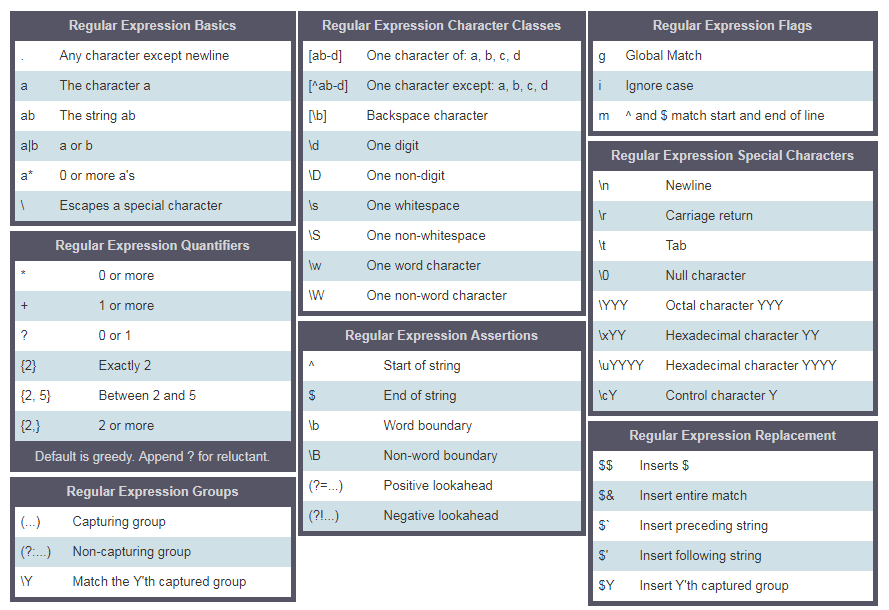

Utilicemos ejemplos para aclarar los metacaracteres anteriores

**Corchetes**

Utilizamos corchetes para incluir minúsculas y mayúsculas

In [ ]:
regex_pattern = r'[Mm]anzana' # el corchete significa ni A o a
txt = 'Manzana y plátano son frutas. Un viejo refran dice que una manzana al día es como un médico de mañana, pero ha sido sustituido por un plátano al día que mantiene al médico lejano. '
matches = re.findall(regex_pattern, txt)
print(matches)  # ['Manzana', 'manzana']

Si queremos buscar el plátano, escribimos el patrón de la siguiente manera:

In [ ]:
regex_pattern = r'[Mm]anzana|[Pp]látano' # this square bracket means either A or a
txt = 'Manzana y plátano son frutas. Un viejo refran dice que una manzana al día es como un médico de mañana, pero ha sido sustituido por un plátano al día que mantiene al médico lejano. '
matches = re.findall(regex_pattern, txt)
print(matches)  # ['Manzana', 'plátano', 'manzana', 'plátano']

Utilizando el corchete y el operador or , conseguimos extraer Manzana, manzana, Plátano y platano.

In [ ]:
regex_pattern = r'\d'  # d es un carácter especial que significa dígitos
txt = 'Las clases comenzaron el 16 de Agosto,2023 y terminan el 12 de Diciembre, 2023'
matches = re.findall(regex_pattern, txt)
print(matches)  # ['1', '6', '2', '0', '2', '3', '1', '2', '2', '0', '2', '3'], esto no es lo que queremos

One or more times(+)

In [ ]:
regex_pattern = r'\d+'  # d is a special character which means digits, + mean one or more times
txt = 'This regular expression example was made on December 6,  2019 and revised on July 8, 2021'
matches = re.findall(regex_pattern, txt)
print(matches)  # ['6', '2019', '8', '2021'] - now, this is better!

**Period(.)**

In [ ]:
regex_pattern = r'[a].'  # this square bracket means a and . means any character except new line
txt = '''Apple and banana are fruits'''
matches = re.findall(regex_pattern, txt)
print(matches)  # ['an', 'an', 'an', 'a ', 'ar']

regex_pattern = r'[a].+'  # . any character, + any character one or more times
matches = re.findall(regex_pattern, txt)
print(matches)  # ['and banana are fruits']

**Zero or more times(*)**

Zero or many times. The pattern could may not occur or it can occur many times.

In [ ]:
regex_pattern = r'[a].*'  # . any character, * any character zero or more times
txt = '''Apple and banana are fruits'''
matches = re.findall(regex_pattern, txt)
print(matches)  # ['and banana are fruits']

**¿Cero o una vez?**

Cero o una vez. El patrón puede no ocurrir o puede ocurrir una vez.

In [ ]:
txt = '''I am not sure if there is a convention how to write the word e-mail.
Some people write it as email others may write it as Email or E-mail.'''
regex_pattern = r'[Ee]-?mail'  # ? means here that '-' is optional
matches = re.findall(regex_pattern, txt)
print(matches)  # ['e-mail', 'email', 'Email', 'E-mail']

**Cuantificador en RegEx**

Podemos especificar la longitud de la subcadena que buscamos en un texto, utilizando una llave. Imaginemos que estamos interesados en una subcadena con una longitud de 4 caracteres:

In [ ]:
txt = 'Este ejemplo de expresion regular se hizo el 16 de agosto de 2022 y se reviso el 16 de agosto de 2023'
regex_pattern = r'\d{4}'  # exactly four times
matches = re.findall(regex_pattern, txt)
print(matches)  # ['2019', '2021']

txt = 'Este ejemplo de expresion regular se hizo el 16 de agosto de 2022 y se reviso el 16 de agosto de 2023'
regex_pattern = r'\d{1, 4}'   # 1 to 4
matches = re.findall(regex_pattern, txt)
print(matches)  # ['6', '2019', '8', '2021']

**Sombrero ^**

Empieza por

In [ ]:
txt = 'Este ejemplo de expresion regular se hizo el 16 de agosto de 2022 y se reviso el 16 de agosto de 2023'
regex_pattern = r'^Este'  # ^ significa que empieza por
matches = re.findall(regex_pattern, txt)
print(matches)  # ['Este']

Negación

In [ ]:
txt = 'Este ejemplo de expresion regular se hizo el 16 de agosto de 2022 y se reviso el 16 de agosto de 2023'
regex_pattern = r'[^A-Za-z ]+'
# ^ en carácter de conjunto significa negación, no de la A a la Z, no de la a a la z, sin espacio
matches = re.findall(regex_pattern, txt)
print(matches)  # ['16', '2022', '16', '2023']

Ejercicios

¿Cuál es la palabra más frecuente en el siguiente párrafo?

    parrafo = "Me encanta enseñar. Si no amas la enseñanza, ¿qué otra cosa puedes amar? Amo Python si no amas algo que te puede dar todas las capacidades para desarrollar una aplicación qué más puedes amar.

[ (3, 'que'),(2,'Si'),(2,'no'),(2,'amas'),(2, 'puedes') ,(2, 'amar'),(1, 'Me'),(1, 'Encanta'),(1,'Enseñar'),(1, 'la'), (1,'enseñanza'),(1, Python),(1, una), (1, aplicación), (1,más), (1,otra),(1, cosa), (1,Amo ),(1,algo ),(1,te ),(1,puede),(1, dar),(1,todas),(1,las),(1,capacidades ),(1,para), (1,desarrollar)]

La posición de algunas partículas en el eje horizontal x son -12, -4, -3 y -1 en sentido negativo, 0 en el origen, 4 y 8 en sentido positivo. Extraer estos números del texto completo y hallar la distancia entre las dos partículas más alejadas.

Considerar que el resultado sera similar a :

puntos_x = ['-12', '-4', '-3', '-1', '0', '4', '8']

puntos_ordenados = [-12, -4, -3, -1, -1, 0, 2, 4, 8]

distancia = 8 -(-12) # 20

Ejercicios: Nivel 2

Escribe un patrón que identifique si una cadena es una variable python válida

is_valid_variable('first_name') # True

is_valid_variable('first-name') # False
is_valid_variable('1first_name') # False
is_valid_variable('firstname') # True

Exercises: Level 3

Clean the following text. After cleaning, count three most frequent words in the string.

sentence = '''%I $am@% a %tea@cher%, &and& I lo%#ve %tea@ching%;. There $is nothing; &as& mo@re rewarding as educa@ting &and& @emp%o@wering peo@ple. ;I found tea@ching m%o@re interesting tha@n any other %jo@bs. %Do@es thi%s mo@tivate yo@u to be a tea@cher!?'''

print(clean_text(sentence));

I am a teacher and I love teaching There is nothing as more rewarding as educating and empowering people I found teaching more interesting than any other jobs Does this motivate you to be a teacher

print(most_frequent_words(cleaned_text))


Expresiones regulares y tokenización de palabras


In [ ]:
##Practicando expresiones regulares: módulo regex, re.split() y re.findall()
import re
text = 'Este ejemplo de expresion regular se hizo el 16 de agosto de 2022 y se reviso el 16 de agosto de 2023'

# Escribe un patrón para que coincida con los finales de frase: frase_finales
sentence_endings = r"[.?!]"

# Divide mi_cadena en los finales de frase e imprime el resultado
print(re.split(sentence_endings, text))

# Encuentra todas las palabras en mayúsculas en mi_cadena e imprime el resultado
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, text))

# Divide mi_cadena en espacios e imprime el resultado
spaces = r"\s+"
print(re.split(spaces, text))

# Encuentra todos los dígitos en mi_cadena e imprime el resultado
digits = r"\d+"
print(re.findall(digits, text))
